## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  
import matplotlib.pyplot as plt 
import seaborn as sns   

## Importing the CSV file

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\ASSIGNMENT_4\ASSIGNMENT_4\Multiple CSV\9.random.csv",header=None) 
df.head() 

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


## checking outliers 

In [5]:
df[2].value_counts()  


1.0    202
0.0    198
Name: 2, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

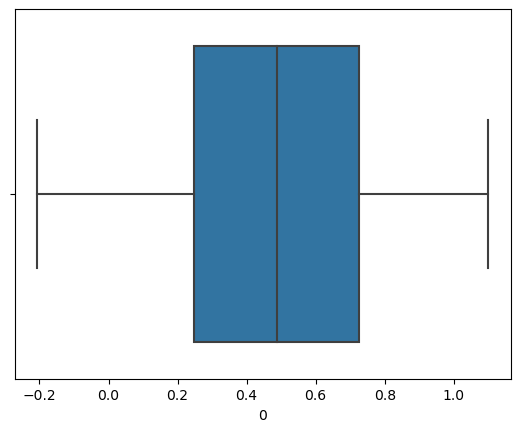

In [6]:
sns.boxplot(df[0])   

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

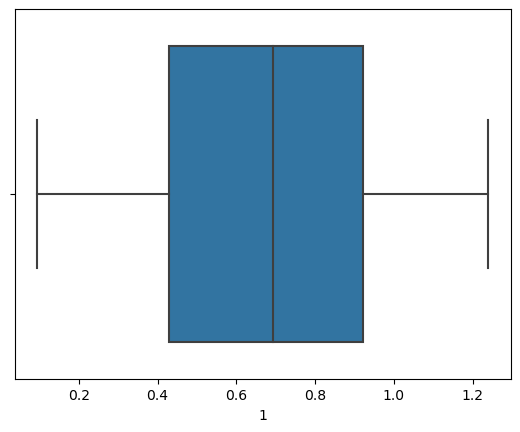

In [7]:
sns.boxplot(df[1])   

## splitting the data into input and output features

In [8]:
x=df[[0,1]] 
y=df[2].astype(int)  

In [9]:
x.head()  

,0,1
0,0.374,1.080
1,0.445,1.140
2,0.514,1.130
3,0.466,1.240
4,0.371,0.968


In [10]:
y.head() 

0    0
1    1
2    0
3    1
4    1
Name: 2, dtype: int32


## Split the data into train and test

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)  

In [12]:
x_train.shape  

(360, 2)

In [13]:
x_test.shape

(40, 2)

## Standardising input features

In [14]:
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure

In [15]:
model=Sequential()
model.add(Dense(16,activation="relu",input_dim=2))
model.add(Dense(14,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid")) 

In [16]:
model.summary()   

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 14)                238       
                                                                 
 dense_2 (Dense)             (None, 12)                180       
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 607 (2.37 KB)
Trainable params: 607 (2.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=50,epochs=1000,validation_split=0.1) 

Epoch 1/1000
7/7 [==============================] - 1s 59ms/step - loss: 0.7345 - accuracy: 0.5031 - val_loss: 0.7249 - val_accuracy: 0.5000
Epoch 2/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.7241 - accuracy: 0.5154 - val_loss: 0.7147 - val_accuracy: 0.5000
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7150 - accuracy: 0.5062 - val_loss: 0.7094 - val_accuracy: 0.4722
Epoch 4/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.7103 - accuracy: 0.4938 - val_loss: 0.7052 - val_accuracy: 0.4722
Epoch 5/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.7063 - accuracy: 0.4938 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 6/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7029 - accuracy: 0.4877 - val_loss: 0.6997 - val_accuracy: 0.5278
Epoch 7/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.7005 - accuracy: 0.4938 - val_loss: 0.6975 - val_accuracy: 0.4444
Epoch 8/1000


Epoch 59/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6887 - accuracy: 0.5525 - val_loss: 0.7041 - val_accuracy: 0.4444
Epoch 60/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6888 - accuracy: 0.5525 - val_loss: 0.7043 - val_accuracy: 0.4444
Epoch 61/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6886 - accuracy: 0.5463 - val_loss: 0.7043 - val_accuracy: 0.4444
Epoch 62/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.5432 - val_loss: 0.7041 - val_accuracy: 0.4444
Epoch 63/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6886 - accuracy: 0.5494 - val_loss: 0.7041 - val_accuracy: 0.4444
Epoch 64/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6885 - accuracy: 0.5525 - val_loss: 0.7040 - val_accuracy: 0.4722
Epoch 65/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.5432 - val_loss: 0.7047 - val_accuracy: 0.4444
Epoch 

7/7 [==============================] - 0s 11ms/step - loss: 0.6877 - accuracy: 0.5463 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 117/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6876 - accuracy: 0.5617 - val_loss: 0.7065 - val_accuracy: 0.4722
Epoch 118/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6875 - accuracy: 0.5494 - val_loss: 0.7065 - val_accuracy: 0.5000
Epoch 119/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6876 - accuracy: 0.5463 - val_loss: 0.7068 - val_accuracy: 0.4722
Epoch 120/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6877 - accuracy: 0.5494 - val_loss: 0.7068 - val_accuracy: 0.4722
Epoch 121/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6877 - accuracy: 0.5463 - val_loss: 0.7068 - val_accuracy: 0.4722
Epoch 122/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6875 - accuracy: 0.5525 - val_loss: 0.7070 - val_accuracy: 0.4722
Epoch 123/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6866 - accuracy: 0.5370 - val_loss: 0.7097 - val_accuracy: 0.4444
Epoch 174/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.5401 - val_loss: 0.7095 - val_accuracy: 0.4444
Epoch 175/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.5432 - val_loss: 0.7094 - val_accuracy: 0.4444
Epoch 176/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6865 - accuracy: 0.5432 - val_loss: 0.7099 - val_accuracy: 0.4722
Epoch 177/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6864 - accuracy: 0.5432 - val_loss: 0.7098 - val_accuracy: 0.4722
Epoch 178/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6866 - accuracy: 0.5525 - val_loss: 0.7097 - val_accuracy: 0.4444
Epoch 179/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6864 - accuracy: 0.5432 - val_loss: 0.7092 - val_accuracy: 0.4444
Epoch 180/1000

7/7 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.5617 - val_loss: 0.7106 - val_accuracy: 0.5000
Epoch 231/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6858 - accuracy: 0.5556 - val_loss: 0.7109 - val_accuracy: 0.4722
Epoch 232/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6855 - accuracy: 0.5556 - val_loss: 0.7113 - val_accuracy: 0.4444
Epoch 233/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.5556 - val_loss: 0.7116 - val_accuracy: 0.4444
Epoch 234/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6854 - accuracy: 0.5556 - val_loss: 0.7114 - val_accuracy: 0.4444
Epoch 235/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6854 - accuracy: 0.5617 - val_loss: 0.7117 - val_accuracy: 0.4444
Epoch 236/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6855 - accuracy: 0.5556 - val_loss: 0.7117 - val_accuracy: 0.4444
Epoch 237/1000

7/7 [==============================] - 0s 14ms/step - loss: 0.6848 - accuracy: 0.5494 - val_loss: 0.7132 - val_accuracy: 0.4444
Epoch 288/1000
7/7 [==============================] - 0s 16ms/step - loss: 0.6847 - accuracy: 0.5525 - val_loss: 0.7124 - val_accuracy: 0.4722
Epoch 289/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6849 - accuracy: 0.5556 - val_loss: 0.7121 - val_accuracy: 0.4722
Epoch 290/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6847 - accuracy: 0.5648 - val_loss: 0.7121 - val_accuracy: 0.4722
Epoch 291/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6847 - accuracy: 0.5586 - val_loss: 0.7120 - val_accuracy: 0.4722
Epoch 292/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6848 - accuracy: 0.5586 - val_loss: 0.7123 - val_accuracy: 0.4722
Epoch 293/1000
7/7 [==============================] - 0s 15ms/step - loss: 0.6847 - accuracy: 0.5556 - val_loss: 0.7125 - val_accuracy: 0.4444
Epoch 294/1000

7/7 [==============================] - 0s 11ms/step - loss: 0.6843 - accuracy: 0.5586 - val_loss: 0.7151 - val_accuracy: 0.4167
Epoch 345/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.5525 - val_loss: 0.7146 - val_accuracy: 0.4167
Epoch 346/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.5525 - val_loss: 0.7145 - val_accuracy: 0.4167
Epoch 347/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6841 - accuracy: 0.5525 - val_loss: 0.7146 - val_accuracy: 0.4167
Epoch 348/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.5525 - val_loss: 0.7145 - val_accuracy: 0.4167
Epoch 349/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6843 - accuracy: 0.5556 - val_loss: 0.7150 - val_accuracy: 0.4167
Epoch 350/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6842 - accuracy: 0.5556 - val_loss: 0.7141 - val_accuracy: 0.4444
Epoch 351/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6835 - accuracy: 0.5494 - val_loss: 0.7160 - val_accuracy: 0.4167
Epoch 402/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6836 - accuracy: 0.5525 - val_loss: 0.7156 - val_accuracy: 0.4444
Epoch 403/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6836 - accuracy: 0.5525 - val_loss: 0.7161 - val_accuracy: 0.4167
Epoch 404/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6836 - accuracy: 0.5525 - val_loss: 0.7154 - val_accuracy: 0.4444
Epoch 405/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6836 - accuracy: 0.5432 - val_loss: 0.7162 - val_accuracy: 0.4167
Epoch 406/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6836 - accuracy: 0.5556 - val_loss: 0.7163 - val_accuracy: 0.4167
Epoch 407/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6837 - accuracy: 0.5525 - val_loss: 0.7160 - val_accuracy: 0.4167
Epoch 408/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.5556 - val_loss: 0.7169 - val_accuracy: 0.4444
Epoch 459/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6830 - accuracy: 0.5586 - val_loss: 0.7163 - val_accuracy: 0.4444
Epoch 460/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6831 - accuracy: 0.5525 - val_loss: 0.7161 - val_accuracy: 0.4444
Epoch 461/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6829 - accuracy: 0.5556 - val_loss: 0.7163 - val_accuracy: 0.4444
Epoch 462/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6831 - accuracy: 0.5556 - val_loss: 0.7167 - val_accuracy: 0.4722
Epoch 463/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6831 - accuracy: 0.5525 - val_loss: 0.7163 - val_accuracy: 0.4444
Epoch 464/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6829 - accuracy: 0.5586 - val_loss: 0.7166 - val_accuracy: 0.4444
Epoch 465/1000

7/7 [==============================] - 0s 14ms/step - loss: 0.6825 - accuracy: 0.5525 - val_loss: 0.7181 - val_accuracy: 0.4722
Epoch 516/1000
7/7 [==============================] - 0s 14ms/step - loss: 0.6826 - accuracy: 0.5617 - val_loss: 0.7181 - val_accuracy: 0.4722
Epoch 517/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6824 - accuracy: 0.5617 - val_loss: 0.7179 - val_accuracy: 0.4722
Epoch 518/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6824 - accuracy: 0.5525 - val_loss: 0.7185 - val_accuracy: 0.4722
Epoch 519/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6825 - accuracy: 0.5494 - val_loss: 0.7183 - val_accuracy: 0.4722
Epoch 520/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6824 - accuracy: 0.5556 - val_loss: 0.7187 - val_accuracy: 0.4722
Epoch 521/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6825 - accuracy: 0.5556 - val_loss: 0.7189 - val_accuracy: 0.4444
Epoch 522/1000

7/7 [==============================] - 0s 11ms/step - loss: 0.6819 - accuracy: 0.5617 - val_loss: 0.7206 - val_accuracy: 0.4444
Epoch 573/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6820 - accuracy: 0.5525 - val_loss: 0.7212 - val_accuracy: 0.4444
Epoch 574/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6817 - accuracy: 0.5525 - val_loss: 0.7208 - val_accuracy: 0.4444
Epoch 575/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6817 - accuracy: 0.5463 - val_loss: 0.7204 - val_accuracy: 0.4722
Epoch 576/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6817 - accuracy: 0.5463 - val_loss: 0.7202 - val_accuracy: 0.4722
Epoch 577/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6819 - accuracy: 0.5556 - val_loss: 0.7199 - val_accuracy: 0.4722
Epoch 578/1000
7/7 [==============================] - 0s 13ms/step - loss: 0.6818 - accuracy: 0.5525 - val_loss: 0.7207 - val_accuracy: 0.4444
Epoch 579/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6810 - accuracy: 0.5617 - val_loss: 0.7210 - val_accuracy: 0.4722
Epoch 630/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6814 - accuracy: 0.5556 - val_loss: 0.7210 - val_accuracy: 0.4722
Epoch 631/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.5586 - val_loss: 0.7210 - val_accuracy: 0.4722
Epoch 632/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.5586 - val_loss: 0.7209 - val_accuracy: 0.4722
Epoch 633/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.5556 - val_loss: 0.7209 - val_accuracy: 0.4722
Epoch 634/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6812 - accuracy: 0.5617 - val_loss: 0.7214 - val_accuracy: 0.4722
Epoch 635/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6815 - accuracy: 0.5586 - val_loss: 0.7216 - val_accuracy: 0.4444
Epoch 636/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6805 - accuracy: 0.5556 - val_loss: 0.7225 - val_accuracy: 0.4444
Epoch 687/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6806 - accuracy: 0.5556 - val_loss: 0.7223 - val_accuracy: 0.4444
Epoch 688/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6809 - accuracy: 0.5617 - val_loss: 0.7223 - val_accuracy: 0.4444
Epoch 689/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6807 - accuracy: 0.5586 - val_loss: 0.7232 - val_accuracy: 0.4444
Epoch 690/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6805 - accuracy: 0.5617 - val_loss: 0.7237 - val_accuracy: 0.4167
Epoch 691/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6805 - accuracy: 0.5586 - val_loss: 0.7229 - val_accuracy: 0.4444
Epoch 692/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6805 - accuracy: 0.5648 - val_loss: 0.7223 - val_accuracy: 0.4444
Epoch 693/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6798 - accuracy: 0.5710 - val_loss: 0.7216 - val_accuracy: 0.4722
Epoch 744/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6798 - accuracy: 0.5802 - val_loss: 0.7221 - val_accuracy: 0.4722
Epoch 745/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6800 - accuracy: 0.5833 - val_loss: 0.7220 - val_accuracy: 0.4722
Epoch 746/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.5741 - val_loss: 0.7216 - val_accuracy: 0.5000
Epoch 747/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6801 - accuracy: 0.5586 - val_loss: 0.7224 - val_accuracy: 0.4722
Epoch 748/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6797 - accuracy: 0.5802 - val_loss: 0.7228 - val_accuracy: 0.4722
Epoch 749/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6799 - accuracy: 0.5741 - val_loss: 0.7220 - val_accuracy: 0.4444
Epoch 750/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6791 - accuracy: 0.5802 - val_loss: 0.7272 - val_accuracy: 0.4444
Epoch 801/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6790 - accuracy: 0.5741 - val_loss: 0.7274 - val_accuracy: 0.4444
Epoch 802/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6790 - accuracy: 0.5833 - val_loss: 0.7278 - val_accuracy: 0.3889
Epoch 803/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6790 - accuracy: 0.5833 - val_loss: 0.7266 - val_accuracy: 0.3889
Epoch 804/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6790 - accuracy: 0.5772 - val_loss: 0.7268 - val_accuracy: 0.4167
Epoch 805/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6791 - accuracy: 0.5772 - val_loss: 0.7251 - val_accuracy: 0.4167
Epoch 806/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6790 - accuracy: 0.5648 - val_loss: 0.7242 - val_accuracy: 0.4444
Epoch 807/1000

7/7 [==============================] - 0s 11ms/step - loss: 0.6784 - accuracy: 0.5741 - val_loss: 0.7265 - val_accuracy: 0.4722
Epoch 858/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6784 - accuracy: 0.5741 - val_loss: 0.7258 - val_accuracy: 0.5000
Epoch 859/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6783 - accuracy: 0.5772 - val_loss: 0.7257 - val_accuracy: 0.4722
Epoch 860/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6789 - accuracy: 0.5710 - val_loss: 0.7270 - val_accuracy: 0.4722
Epoch 861/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6781 - accuracy: 0.5710 - val_loss: 0.7270 - val_accuracy: 0.4722
Epoch 862/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6783 - accuracy: 0.5833 - val_loss: 0.7269 - val_accuracy: 0.4722
Epoch 863/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6784 - accuracy: 0.5679 - val_loss: 0.7255 - val_accuracy: 0.5000
Epoch 864/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6780 - accuracy: 0.5648 - val_loss: 0.7275 - val_accuracy: 0.5000
Epoch 915/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6779 - accuracy: 0.5772 - val_loss: 0.7280 - val_accuracy: 0.4722
Epoch 916/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6778 - accuracy: 0.5648 - val_loss: 0.7286 - val_accuracy: 0.4722
Epoch 917/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6778 - accuracy: 0.5710 - val_loss: 0.7286 - val_accuracy: 0.4722
Epoch 918/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6777 - accuracy: 0.5710 - val_loss: 0.7288 - val_accuracy: 0.4722
Epoch 919/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6776 - accuracy: 0.5648 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 920/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6777 - accuracy: 0.5617 - val_loss: 0.7283 - val_accuracy: 0.4722
Epoch 921/1000

7/7 [==============================] - 0s 12ms/step - loss: 0.6772 - accuracy: 0.5710 - val_loss: 0.7278 - val_accuracy: 0.4722
Epoch 972/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6772 - accuracy: 0.5617 - val_loss: 0.7281 - val_accuracy: 0.4722
Epoch 973/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6774 - accuracy: 0.5679 - val_loss: 0.7280 - val_accuracy: 0.4722
Epoch 974/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6773 - accuracy: 0.5710 - val_loss: 0.7284 - val_accuracy: 0.5000
Epoch 975/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6770 - accuracy: 0.5648 - val_loss: 0.7283 - val_accuracy: 0.4722
Epoch 976/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.6769 - accuracy: 0.5741 - val_loss: 0.7287 - val_accuracy: 0.5000
Epoch 977/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.6767 - accuracy: 0.5741 - val_loss: 0.7281 - val_accuracy: 0.5000
Epoch 978/1000

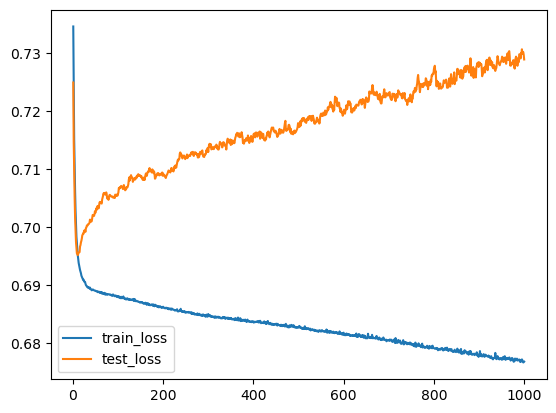

In [18]:
plt.plot(range(1,1001),history.history["loss"],label="train_loss")
plt.plot(range(1,1001),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [19]:
predicted=model.predict(x_test) 
predicted 

2/2 [==============================] - 0s 5ms/step


array([[0.5290752 ],
       [0.40086767],
       [0.509703  ],
       [0.5420486 ],
       [0.4712655 ],
       [0.4882419 ],
       [0.54468477],
       [0.54577917],
       [0.5155429 ],
       [0.4832014 ],
       [0.53003913],
       [0.48510885],
       [0.5327308 ],
       [0.5580052 ],
       [0.40680528],
       [0.5554238 ],
       [0.33913296],
       [0.56113166],
       [0.5178611 ],
       [0.48631954],
       [0.46530262],
       [0.49031848],
       [0.521028  ],
       [0.48025265],
       [0.5277582 ],
       [0.5777437 ],
       [0.5359874 ],
       [0.53133035],
       [0.50252765],
       [0.5455125 ],
       [0.44970322],
       [0.47327837],
       [0.51043   ],
       [0.54456   ],
       [0.47309026],
       [0.55801207],
       [0.5668931 ],
       [0.53545314],
       [0.42467162],
       [0.54010725]], dtype=float32)

In [20]:
predicted=np.where(predicted>0.5,1,0)
predicted   

array([[1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]])

## Evaluating the model

0.475


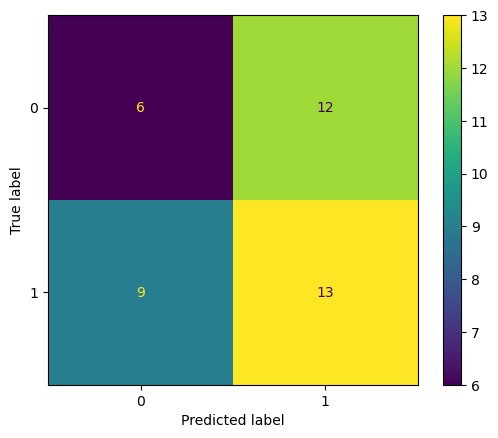

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTTING THE DECISION SURFACE

In [22]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 23s 2ms/step


<AxesSubplot:>

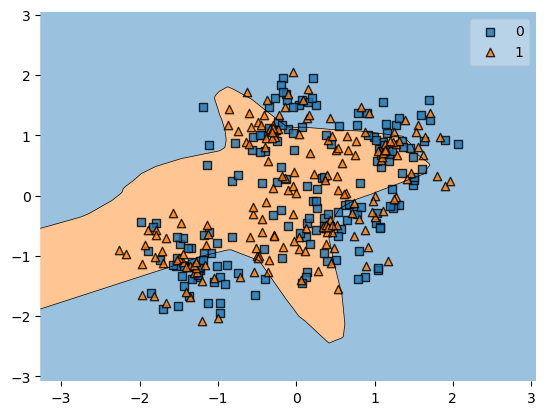

In [23]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 23s 2ms/step


<Axes: >

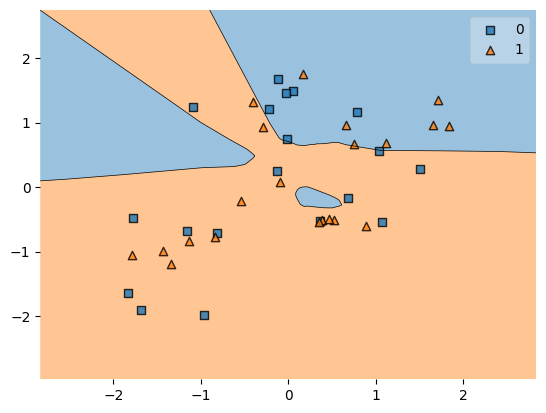

In [23]:
plot_decision_regions(x_test,y_test.values,clf=model)   

## Conclusions:

###### This neural network model achieves an accuracy of 50%. The model architecture consists of 4 hidden layers with the following specifications:

- 1st HL:- 16 neurons ReLU as activation function.
- 2nd HL:- 14 neurons ReLU as activation function.
- 3rd HL:- 12 neurons ReLU as activation function.
- 4th HL:- 10 neurons ReLU as activation function.

###### The output layer uses the sigmoid activation function.


###### Loss function: Binary cross-entropy.
- Optimizer: Stochastic Gradient Descent (SGD) with a batch size of 10 and a learning rate of 0.01.
- The model was trained for 1000 epochs.
 